# Word Frequency Based Clustering







This script performs a cluster analysis of a dataset of abstracts based on the frequency of words appering in those abstracts. 

***Steps in this script***

(1) Firts, all abstracts are extracted from the excel table and put into a list. 

(2) The text must get **preprocessed**, which includes: 
1. **Tokenization**: Breaks down abstracts into individual words and 
2. **Normalization**: all words become lower case. 
3. Also we will use a default list of **"Stopwords"** to remove those words from the abstracts. Stopwords are words like "and", "a", "she", ... that are specifically usefull for the cluster analysis. 
4. For better handling, the sublist of remaining words per abstract is converted into a string. 
5. Then we need to **lemmatize** the words. Lemmatization is a process that converts the inflected forms of a word into its base form. For example, in English, the verb 'to walk' may appear as 'walk', 'walked', 'walks' or 'walking'. The base form, 'walk', that one might look up in a dictionary, is called the lemma for the word.

(3) **Feature Extraction**: For the analysis we use the Tf IDF Method. It counts how often a word appears (TF = Term Frequency) and additionally measures the "Importance" of a words. Words that appear more often will have less weight (IDF = Inverse Document Frequency). 
Feature extraction here means that we set, how often a word has to appear in all abstracts to be included in the analysis and further, if a word appears in more than 70% of the documents, it will be ignored.

(4) **Clustering**: We will use the *KMeans* Algorithm.This clustering algorithm groups the abstracts into a predefined number of k clusters. Each cluster has a so-called cluster centroid, and the goal is to minimize the sum of squared distances between data points and their nearest cluster centroids.

(5) Visualization and Interpretation

## Data Preparation

In [2]:
import pandas as pd
#Load data from Excel
df = pd.read_excel('biodiversity_policies_en.xlsx')
#converts Abstracts from the Excel-File into a list where each element is a string representing an abstract
abstracts_list = df['Abstract_en'].astype(str).tolist()

## Preprocessing

In [3]:
#import packages for Tokenization, Stopword list and Lemmatization, 
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
# Tokenization and Normalization
tokenized = [word_tokenize(doc.lower()) for doc in abstracts_list]

In [5]:
#Download Stopword list
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [8]:
#Remove stopwords
stop_words = set(stopwords.words('english'))
#The Purpose of the following is to exclude additional words, but it does not work yet
custom_stop_words = {"act", "law", 'shall', 'use', ',', '.', ')', 'art', '(', "'", ":", "1"}  # Add your custom stopwords here
stop_words.update(custom_stop_words)
stop_words=list(stop_words)
filtered = [[token for token in tokens if token not in stop_words] for tokens in tokenized]

In [9]:
#Convert each sublist into a string, we need this for lemmatization
filtered = [' '.join(sublist) for sublist in filtered]

In [10]:
#Lemmanization
lemmatizer = WordNetLemmatizer()
words = [lemmatizer.lemmatize(token) for token in filtered]

## Feature Extraction

We use the Tf IDF Method. It counts how often a word appears (TF = Term Frequency) and additionally measures the "Importance" of a words. Words that appear more often will have less weight (IDF = Inverse Document Frequency), because a matching occurrence of rare terms is more meaningful for relevance than a match for very common words. 

To do this we use `TfidfVectorizer`. A vectorizer converts text data into numerical data (vectors) that machine learning algorithms can work with. The `TfidfVectorizer` converts our abstracts into a matrix of TF_IDF features. For this process we set some inclusion criteria for the words in terms of frequency. In this case we set that a word must appear at least in 2 abstracts to be relevant and if a word appears in more than 70% of the documents, it will be ignored. Further, very common english words are excluded. 

The vectorizer learns the vocabulary from the abstracts while applying the parameters. Each abstract is then transformed into a vector based on the TF-IDF scores of the terms in the vocabulary.

The result, X, is a sparse matrix where:

   - Each row represents a document from abstracts_list.
   - Each column represents a term from the vocabulary.
   - The values in the matrix represent the TF-IDF score of each term in each document.

In [11]:
#Import Package for Feature Extraction using the Tf IDF Method
from sklearn.feature_extraction.text import TfidfVectorizer

In [25]:
#Feature Extraction
#max_df=0.7 means that if a word appears in more than 70% of the documents, it will be ignored
#min_df=2 means that a word must appear in at least 2 documents to be considered
vectorizer = TfidfVectorizer(stop_words=stop_words, max_df=0.7, min_df=2)
X = vectorizer.fit_transform(words)

## Clustering

The clustering is performed using the KMeans clustering algorithm that aims to group a set of data points (in our case the TF IDF vectors) into a predefined number k of clusters.

The algorithm works as follows: In the initializatio, random k data points are determined as cluster centers, the so-called centroids. Using a `random_state`parameter, we make this process reproducable. All other dtaa points are now assigned to one of the clusters with the goal is to minimize the sum of squared distances between data points and their nearest cluster centroids.
A new cluster center is now calculated for each group. It corresponds to the point in the cluster that has the smallest distance to all other data points in the group. If the cluster center has not changed at all (or only very slightly), the algorithm stops here. If not, it goes back to step 3 and assigns the data points to the next cluster again. 

For more information see the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) or the [User Guide](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) of the KMeans Algorithm by scikit learn.

In [13]:
#import packages for clustering usig KMeans method
from sklearn.cluster import KMeans

#from sklearn.metrics import silhouette_score
#With the silhouette_score it is theoretically possible to try different values for k and select a useful one. 
#This is sometimes applied because a previously chosen k can result in bad clustering. 

In [26]:
#Clustering
num_clusters = 5  #Number of clusters
#initializing the kmeans clustering algorithm
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
#fit trains the model and does the actual clustering 
kmeans = kmeans.fit(X)

C:\Users\LENOVO\anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


## Visualization

Now we have the clusters, so we can look at the words that form the clusters. From that we can derive thematic groups of the abstracts. This helps to characterize the abstracts, get an overview of repeating themes. The groups can be further analysied statistically. 

However, after looking at the words forming each cluster, we are going to visualize the clusters in relation to each other. This helps to get a feeling of how strong the clusters can be distinguished from each other. After that you might want to try another value for k, because you see that some clusters are heavily overlapping. 

In [27]:
# Print top words per cluster
terms = vectorizer.get_feature_names_out()
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
for i in range(num_clusters):
    top_terms = [terms[ind] for ind in order_centroids[i, :10]]
    print(f"Cluster {i} top terms: {', '.join(top_terms)}")

Cluster 0 top terms: protected, areas, natural, area, parks, park, management, national, conservation, reserves
Cluster 1 top terms: organisms, modified, biological, genetic, diversity, resources, genetically, protocol, sharing, convention
Cluster 2 top terms: biodiversity, development, agricultural, rural, protection, conservation, sustainable, land, national, article
Cluster 3 top terms: environmental, environment, protection, natural, management, resources, impact, pollution, development, assessment
Cluster 4 top terms: hunting, species, wildlife, wild, fauna, protection, conservation, habitats, endangered, management


I will now assign each abstract with its cluster in our original data frame. The clusters are stored in `kmeans.labels`. 

In [17]:
Cluster_Num = kmeans.labels_
df['Cluster'] = Cluster_Num
Cluster_Name = {0: "Parks and Protected Areas", 
                1: "Genetic Resources", 
                2: "Agriculture", 
                3: "Environmental Protection", 
                4: "Species oriented"}
df['Cluster_Name'] = df['Cluster'].map(Cluster_Name)
df.to_excel('biodiversity_policies_clustered.xlsx', index=False)

By using the Principle Component Analysis (PCA) I will now visualize the clusters and their relation to each other. PCA reduces the data (Matrix X) to 2 dimensions without losing too much information, so that we can visualize the data in a 2D plot. 

In [18]:
#import packages for visualization
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re

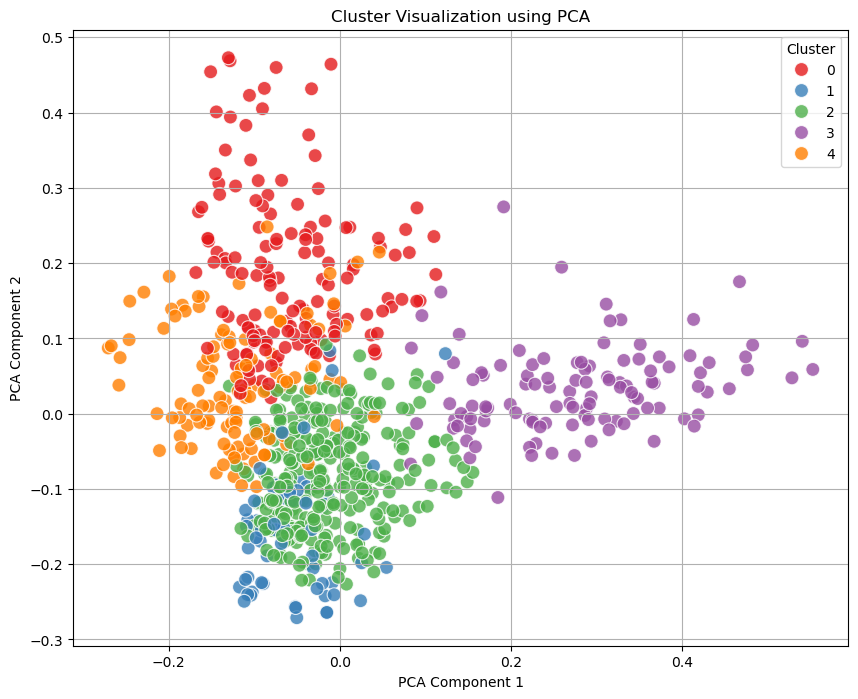

Cluster 0 top terms: protected, areas, natural, area, parks, park, management, national, conservation, reserves
Cluster 1 top terms: genetic, biological, resources, protocol, plant, diversity, modified, sharing, benefits, access
Cluster 2 top terms: biodiversity, agricultural, development, rural, article, national, production, land, provisions, products
Cluster 3 top terms: environmental, environment, protection, natural, management, resources, pollution, impact, assessment, development
Cluster 4 top terms: hunting, species, wildlife, wild, fauna, protection, conservation, habitats, endangered, management


In [19]:
#Dimensionality reduction and visualization (PCA example)
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X.toarray()) #x.toarray is needed because X was sparse before and we need a dense array

# Plotting clusters based on PCA
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans.labels_, palette='Set1', s=100, alpha=0.8)
plt.title('Cluster Visualization using PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Step 7: Identifying significant indicator words (example)
terms = vectorizer.get_feature_names_out()
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]

# Example: Print top terms per cluster
for i in range(num_clusters):
    top_terms = [terms[ind] for ind in order_centroids[i, :10]]
    print(f"Cluster {i} top terms: {', '.join(top_terms)}")



## Plot with Key Words

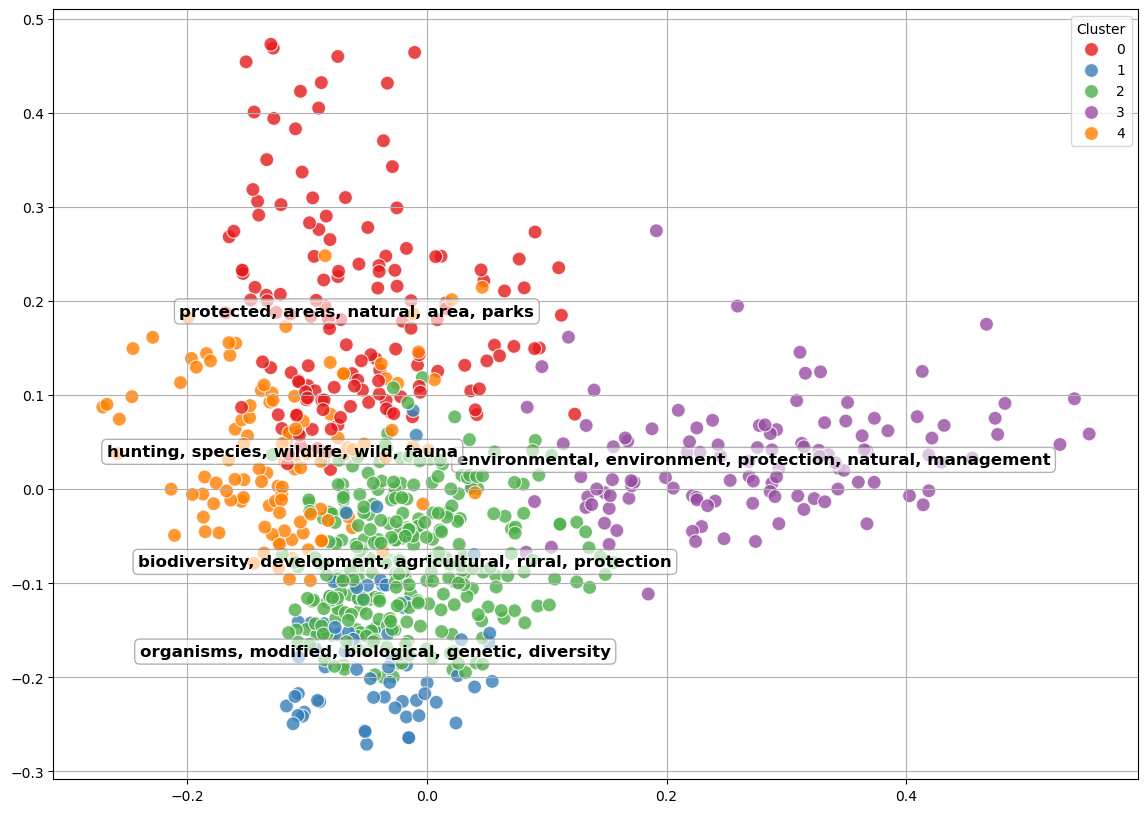

In [28]:
terms = vectorizer.get_feature_names_out()
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]

top_n_words = 5  # Number of top words to display per cluster
indicator_words = []
for i in range(kmeans.n_clusters):
    cluster_terms = [terms[ind] for ind in order_centroids[i, :top_n_words]]
    indicator_words.append(", ".join(cluster_terms))

import matplotlib.pyplot as plt
import seaborn as sns

# PCA transformation
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X.toarray())

# Plotting clusters based on PCA
plt.figure(figsize=(14, 10))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans.labels_, palette='Set1', s=100, alpha=0.8)

# Adding indicator words as labels
for i in range(kmeans.n_clusters):
    # Find the centroid of each cluster in the PCA-transformed space
    cluster_points = X_pca[kmeans.labels_ == i]
    centroid = cluster_points.mean(axis=0)
    plt.text(centroid[0], centroid[1], indicator_words[i], 
             horizontalalignment='center', 
             verticalalignment='center', 
             fontsize=12, 
             weight='bold', 
             color='black', 
             bbox=dict(facecolor='white', alpha=0.6, edgecolor='gray', boxstyle='round,pad=0.3'))

plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.legend(title='Cluster', loc='best')
plt.grid(True)
plt.show()